### More parameters in Q-learning

[20, 20]
<class 'numpy.ndarray'>
0
Episode: 0 avg: -200.0 min: -200.0 max: -200.0
500
Episode: 500 avg: -200.0 min: -200.0 max: -200.0
Destination reachend on episode 632
Destination reachend on episode 636
Destination reachend on episode 638
Destination reachend on episode 640
Destination reachend on episode 674
Destination reachend on episode 678
Destination reachend on episode 682
Destination reachend on episode 683
Destination reachend on episode 686
Destination reachend on episode 687
Destination reachend on episode 750
Destination reachend on episode 759
Destination reachend on episode 775
Destination reachend on episode 776
Destination reachend on episode 777
Destination reachend on episode 780
Destination reachend on episode 783
Destination reachend on episode 784
Destination reachend on episode 787
Destination reachend on episode 788
Destination reachend on episode 789
Destination reachend on episode 793
Destination reachend on episode 798
Destination reachend on episode 800
D

Destination reachend on episode 1563
Destination reachend on episode 1569
Destination reachend on episode 1570
Destination reachend on episode 1574
Destination reachend on episode 1575
Destination reachend on episode 1576
Destination reachend on episode 1577
Destination reachend on episode 1578
Destination reachend on episode 1579
Destination reachend on episode 1580
Destination reachend on episode 1581
Destination reachend on episode 1582
Destination reachend on episode 1583
Destination reachend on episode 1584
Destination reachend on episode 1585
Destination reachend on episode 1587
Destination reachend on episode 1589
Destination reachend on episode 1590
Destination reachend on episode 1591
Destination reachend on episode 1592
Destination reachend on episode 1593
Destination reachend on episode 1595
Destination reachend on episode 1596
Destination reachend on episode 1598
Destination reachend on episode 1599
Destination reachend on episode 1600
Destination reachend on episode 1602
D

Destination reachend on episode 1857
Destination reachend on episode 1865
Destination reachend on episode 1870
Destination reachend on episode 1872
Destination reachend on episode 1873
Destination reachend on episode 1887
Destination reachend on episode 1928
Destination reachend on episode 1946
Destination reachend on episode 1951
Destination reachend on episode 1953
Destination reachend on episode 1957
Destination reachend on episode 1959
Destination reachend on episode 1960
Destination reachend on episode 1964
Destination reachend on episode 1965
Destination reachend on episode 1968
Destination reachend on episode 1971
Destination reachend on episode 1972
Destination reachend on episode 1973
Destination reachend on episode 1976
Destination reachend on episode 1977
Destination reachend on episode 1978
Destination reachend on episode 1979
Destination reachend on episode 1980
Destination reachend on episode 1983
Destination reachend on episode 1986
Destination reachend on episode 1987
D

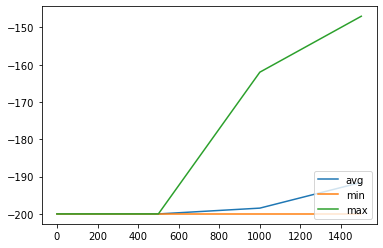

In [2]:
import sys
sys.path.append('/home/dell/miniconda3/lib/python3.8/site-packages')
import gym 
import numpy as np
import matplotlib.pyplot as plt
env=gym.make('MountainCar-v0')

LEARNING_RATE=0.1
DISCOUNT=0.95
EPISODES=2000
SHOW_EVERY=500
DISCRETE_OS_SIZE=[20]* len(env.observation_space.high)


discrete_os_win_size=(env.observation_space.high-env.observation_space.low)/DISCRETE_OS_SIZE

epsilon=0.5
START_EPSILON_DECAYING= 1
END_EPSILON_DECAYING= EPISODES//2
epsilon_decay_value= epsilon/(END_EPSILON_DECAYING- START_EPSILON_DECAYING)

print(DISCRETE_OS_SIZE)
print(type(discrete_os_win_size))
q_table = np.random.uniform(low=-2, high=0,size=(DISCRETE_OS_SIZE + [env.action_space.n]))

ep_rewards=[]
aggr_ep_rewards={'ep':[], "avg":[], 'min': [], 'max':[]}

#print(q_table)
#q_table= np.random.uniform(low=-2.0, high=0.0, size=(DISCRETE_OS_SIZE+[env.action_space.n]))
def get_discrete_state(state):
    discrete_state=(state-env.observation_space.low)/discrete_os_win_size
    return tuple(discrete_state.astype(np.int))

for episode in range(EPISODES):
    episode_reward=0
    if episode % SHOW_EVERY ==0:
        print(episode)
        render= True
    else:
        render= False
        
    discrete_state= get_discrete_state(env.reset())
    #print(np.argmax(q_table[discrete_state]))

    done=False
    while not done:
        
        if np.random.random()>epsilon:
            action=np.argmax(q_table[discrete_state])
        else:
            action=np.random.randint(0, env.action_space.n)
            
        new_state, reward, done, _ =env.step(action)
        episode_reward+= reward
        new_discrete_state= get_discrete_state(new_state)

        if render:
            
            env.render()
        if not done:
            #Because we need max q_value to update q equation for Q-learning
            max_future_q=np.max(q_table[new_discrete_state])
            current_q= q_table[discrete_state + (action, )]
            new_q= (1-LEARNING_RATE)* current_q + LEARNING_RATE*(reward+ DISCOUNT*max_future_q)
            q_table[discrete_state+ (action, )]=new_q
        elif new_state[0]>= env.goal_position:
            print(f"Destination reachend on episode {episode}")
            q_table[ discrete_state + (action, )] = 0
        discrete_state= new_discrete_state
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon-= epsilon_decay_value
    ep_rewards.append(episode_reward)
    
    if not episode % SHOW_EVERY:
        #np.save(f"q_tables/{episode}-qtable.npy",q_table)
        average_reward= sum(ep_rewards[-SHOW_EVERY:])/len(ep_rewards[-SHOW_EVERY:])
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['min'].append(min(ep_rewards[-SHOW_EVERY:]))
        aggr_ep_rewards['max'].append(max(ep_rewards[-SHOW_EVERY:]))
        print(f"Episode: {episode} avg: {average_reward} min: {min(ep_rewards[-SHOW_EVERY:])} max: {max(ep_rewards[-SHOW_EVERY:])}")
        
env.close()

plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label= "avg")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label= "min")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label= "max")
plt.legend(loc=4)
plt.show()